# Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images CIFAR-10 dataset from tensorflow keras datasets.

1. There are total 10 classes as shown below. We will use CNN for classification
2. The CIFAR-10 dataset consists of 60000 with 32x32 colour images in 10 classes, with 6000 images per class. 
3. There are 50000 training images and 10000 test images. 
4. The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

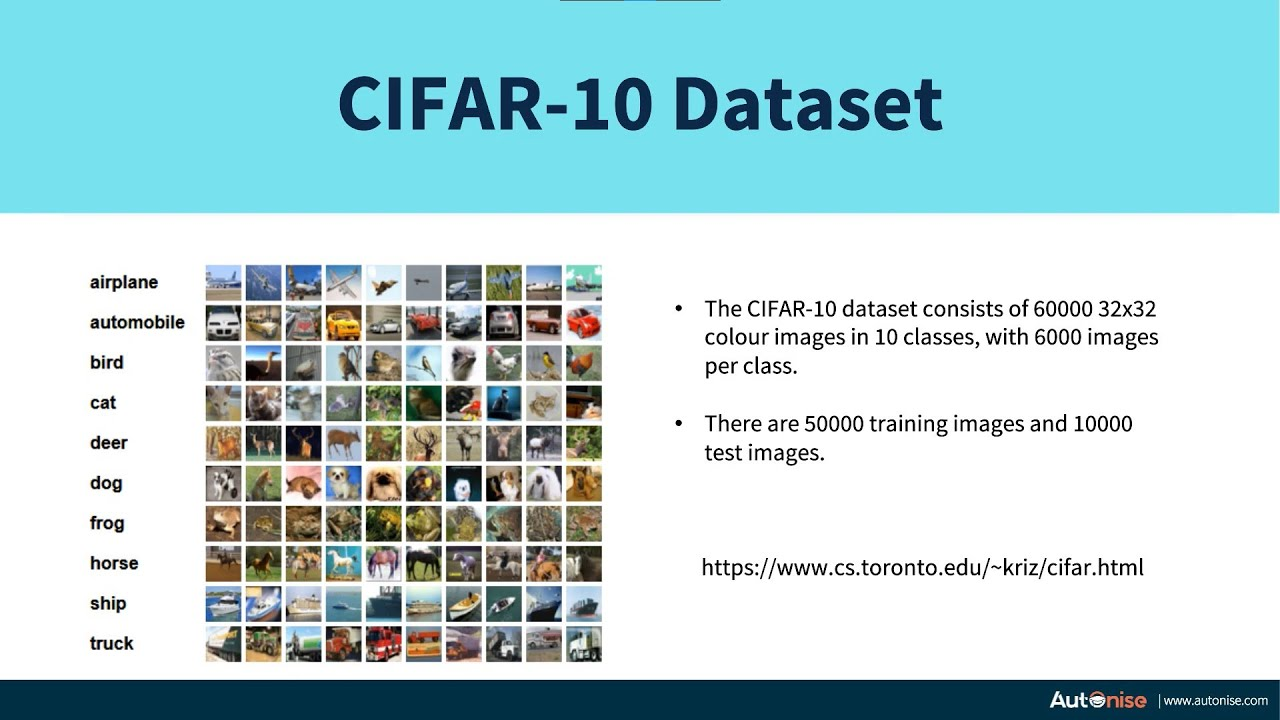

## CNN

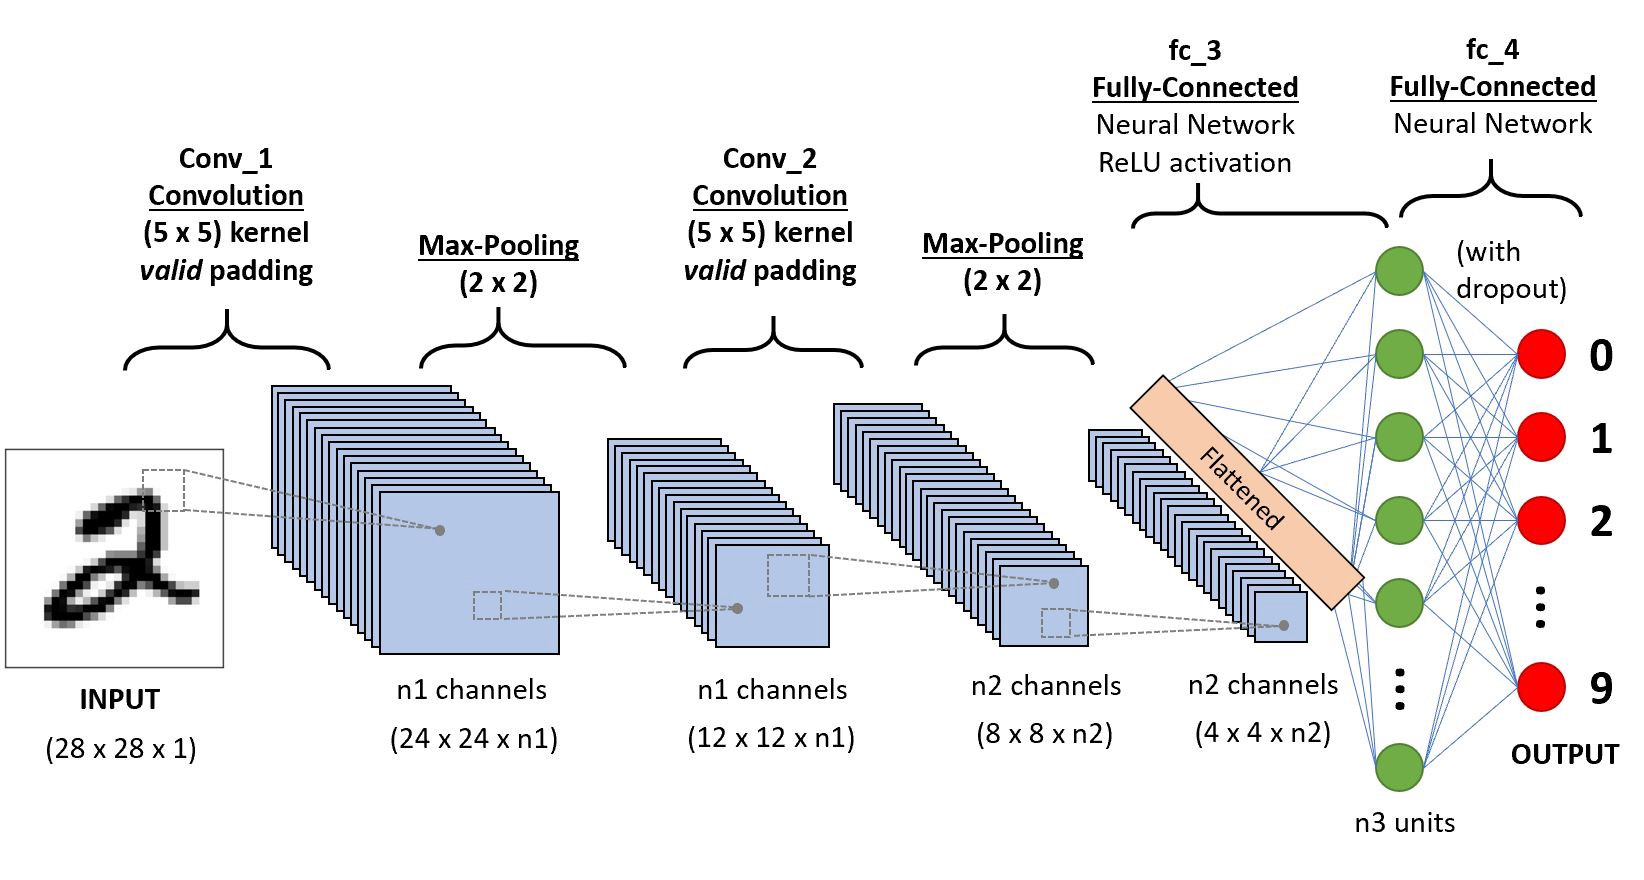

# 1.Import Python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# 2. Load the dataset

In [2]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()
print("X Train:",X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:",Y_train.shape)
print("Y Test:",Y_test.shape)

170498071/170498071 [==============================] - 31s 0us/step
X Train: (50000, 32, 32, 3)
X Test: (10000, 32, 32, 3)
Y Train: (50000, 1)
Y Test: (10000, 1)


**Observations**
1. Here we see there are 50000 training images and 10000 test images

In [3]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Y_train is a 2D array, for our classification having 1D array is good enough. 
so we will convert this to now 1D array

In [4]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)
print("Y Train:",Y_train.shape)
print("Y Test:",Y_test.shape)
Y_train[:5]

Y Train: (50000,)
Y Test: (10000,)


array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [6]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (12,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

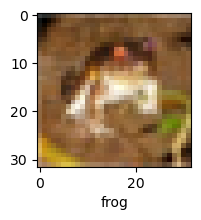

In [7]:
plot_sample(X_train, Y_train, 0)

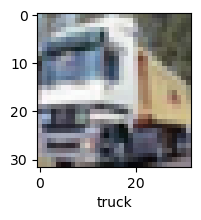

In [8]:
plot_sample(X_train, Y_train, 1)

# 3.Normalizing the training data

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# 4. Build simple artificial neural network for image classification

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=10)



Epoch 1/10


1563/1563 [==============================] - 194s 123ms/step - loss: 1.8920 - accuracy: 0.3304
Epoch 2/10
1563/1563 [==============================] - 195s 125ms/step - loss: 1.6563 - accuracy: 0.4062
Epoch 3/10
1563/1563 [==============================] - 194s 124ms/step - loss: 1.5703 - accuracy: 0.4356
Epoch 4/10
1563/1563 [==============================] - 200s 128ms/step - loss: 1.5214 - accuracy: 0.4541
Epoch 5/10
1563/1563 [==============================] - 190s 121ms/step - loss: 1.4798 - accuracy: 0.4723
Epoch 6/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.4478 - accuracy: 0.4838
Epoch 7/10
1563/1563 [==============================] - 193s 123ms/step - loss: 1.4215 - accuracy: 0.4911
Epoch 8/10
1563/1563 [==============================] - 204s 131ms/step - loss: 1.3963 - accuracy: 0.5040
Epoch 9/10
1563/1563 [==============================] - 193s 124ms/step - loss: 1.3718 - accuracy: 0.5069
Epoch 10/10
1563/1563 [===================

**Observations**
1. ANN - at the end of 10 epochs, accuracy is at around 50.90%

In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.51      0.55      1000
           1       0.63      0.60      0.61      1000
           2       0.36      0.38      0.37      1000
           3       0.39      0.12      0.18      1000
           4       0.42      0.40      0.41      1000
           5       0.38      0.50      0.43      1000
           6       0.43      0.64      0.52      1000
           7       0.49      0.61      0.54      1000
           8       0.63      0.63      0.63      1000
           9       0.60      0.51      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



#  5. Build a convolutional neural network 

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.summary()

history=cnn.fit(X_train, Y_train, epochs=30)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                     

**Observations**
1. With CNN, at the end 10 epochs, accuracy was at around 78.13% which is a significant improvement over ANN

In [13]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2826 - accuracy: 0.6856


[2.282623291015625, 0.6855999827384949]

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.84      0.82      0.83      1000
           2       0.61      0.54      0.57      1000
           3       0.49      0.43      0.46      1000
           4       0.65      0.58      0.61      1000
           5       0.54      0.63      0.58      1000
           6       0.76      0.75      0.75      1000
           7       0.69      0.78      0.73      1000
           8       0.81      0.79      0.80      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.92220531e-09, 3.15821501e-11, 1.09153291e-08, 9.99923348e-01,
        3.10480504e-12, 7.28902669e-05, 3.63654203e-06, 1.10631315e-09,
        2.87316873e-08, 8.07234901e-09],
       [3.65804817e-11, 9.99999285e-01, 2.52886679e-24, 9.51175347e-23,
        1.17575330e-25, 3.53202648e-28, 1.63581132e-27, 1.75229457e-26,
        6.63630203e-07, 1.13006410e-10],
       [1.26445328e-03, 1.04754599e-05, 1.08337513e-13, 6.89254209e-10,
        5.89734121e-12, 1.00599714e-16, 6.31314532e-12, 2.10912329e-13,
        9.98724997e-01, 4.81755746e-09],
       [9.99951720e-01, 8.00037730e-14, 1.78711304e-07, 6.55247774e-13,
        1.95909997e-05, 8.42374398e-17, 2.30867697e-16, 6.26415381e-16,
        2.85854494e-05, 5.14267451e-18],
       [3.60642438e-14, 1.08019635e-10, 7.64306242e-06, 1.44079106e-03,
        3.01227849e-02, 1.23755975e-12, 9.68428850e-01, 5.63336732e-16,
        1.89828635e-13, 3.49634263e-16]], dtype=float32)

# 6. Predict

1/1 [==============================] - 0s 33ms/step
class: 0 name= airplane


C:\Users\91956\AppData\Local\Temp\ipykernel_15632\4292706812.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  fileImage = Image.open("test_1.jpeg").convert("RGB").resize([32,32],Image.ANTIALIAS)


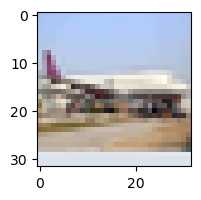

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
from PIL import Image
fileImage = Image.open("test_1.jpeg").convert("RGB").resize([32,32],Image.ANTIALIAS)
image = np.array(fileImage)
myimage = image.reshape(1, 32,32,3)
# prepare pixel data
myimage = myimage.astype('float32')
myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = cnn.predict(myimage)
y_class = np.argmax(my_predicted_image)
print("class:",y_class,"name=",classes[y_class])

# 7. Evaluate the model

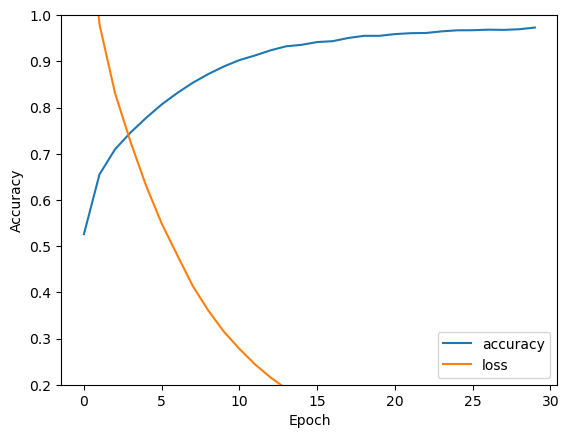

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()


# 8.Summary
1. ANN - at the end of 10 epochs, accuracy is at around 50.90%
2. With CNN, at the end 10 epochs, accuracy was at around 78.13% which is a significant improvement over ANN.
3. CNN - The specified input data is initially forwarded to a feature extraction network, and then the resultant extracted features are forwarded to a classifier network.